# Homework 2: Machine Learning for Regression for Machine Learning Zoomcamp 2025

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression ,Ridge
from sklearn.metrics import mean_squared_error
import numpy as np


In [13]:
df = pd.read_csv('data/car_fuel_efficiency.csv')
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9704 entries, 0 to 9703
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   engine_displacement  9704 non-null   int64  
 1   num_cylinders        9222 non-null   float64
 2   horsepower           8996 non-null   float64
 3   vehicle_weight       9704 non-null   float64
 4   acceleration         8774 non-null   float64
 5   model_year           9704 non-null   int64  
 6   origin               9704 non-null   object 
 7   fuel_type            9704 non-null   object 
 8   drivetrain           9704 non-null   object 
 9   num_doors            9202 non-null   float64
 10  fuel_efficiency_mpg  9704 non-null   float64
dtypes: float64(6), int64(2), object(3)
memory usage: 834.1+ KB


In [15]:
cols = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']
df = df[cols]

In [16]:
#Q1
df.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

In [17]:
df['fuel_efficiency_mpg'].describe()

count    9704.000000
mean       14.985243
std         2.556468
min         6.200971
25%        13.267459
50%        15.006037
75%        16.707965
max        25.967222
Name: fuel_efficiency_mpg, dtype: float64

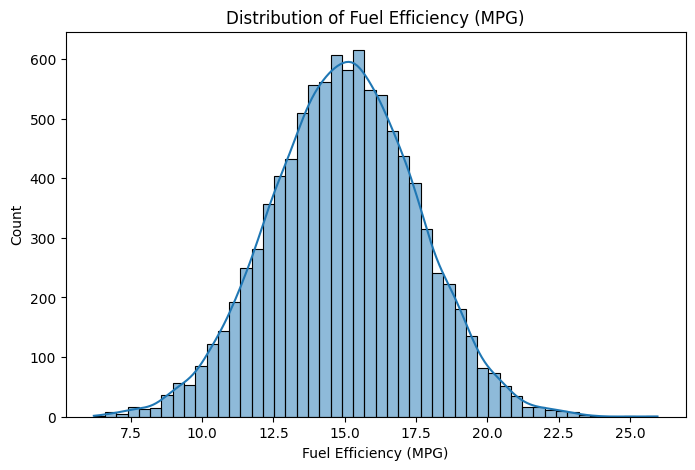

In [19]:
plt.figure(figsize=(8,5))
sns.histplot(df['fuel_efficiency_mpg'], bins=50, kde=True)
plt.title('Distribution of Fuel Efficiency (MPG)')
plt.xlabel('Fuel Efficiency (MPG)')
plt.ylabel('Count')
plt.show()


In [21]:
#Q2
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
df['horsepower'].median()


np.float64(149.0)

In [24]:
#Q3
# Split 60% train, 40% temp
df_train, df_temp = train_test_split(df, test_size=0.4, random_state=42)

# Split temp into 20% val, 20% test (half of 40%)
df_val, df_test = train_test_split(df_temp, test_size=0.5, random_state=42)

In [25]:
y_train = df_train['fuel_efficiency_mpg']
y_val = df_val['fuel_efficiency_mpg']

X_train = df_train.drop('fuel_efficiency_mpg', axis=1)
X_val = df_val.drop('fuel_efficiency_mpg', axis=1)

In [26]:
#Option 1: Fill missing with 0
X_train_0 = X_train.fillna(0)
X_val_0 = X_val.fillna(0)

model_0 = LinearRegression()
model_0.fit(X_train_0, y_train)

y_pred_0 = model_0.predict(X_val_0)
rmse_0 = np.sqrt(mean_squared_error(y_val, y_pred_0))
print("RMSE (fill with 0):", round(rmse_0, 2))


RMSE (fill with 0): 0.52


In [27]:
#Option 2: Fill missing with mean (train only)
mean_hp = X_train['horsepower'].mean()

X_train_mean = X_train.fillna({'horsepower': mean_hp})
X_val_mean = X_val.fillna({'horsepower': mean_hp})

model_mean = LinearRegression()
model_mean.fit(X_train_mean, y_train)

y_pred_mean = model_mean.predict(X_val_mean)
rmse_mean = np.sqrt(mean_squared_error(y_val, y_pred_mean))
print("RMSE (fill with mean):", round(rmse_mean, 2))


RMSE (fill with mean): 0.46


In [35]:
#Q4

r_values = [0, 0.01, 0.1, 1, 5, 10, 100]
rmse_scores = {}

print("🔹 Training Ridge Regression with different regularization strengths (r):\n")

for r in r_values:
    model = Ridge(alpha=r)
    model.fit(X_train_0, y_train)
    y_pred = model.predict(X_val_0)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    rmse_scores[r] = round(rmse, 2)
    print(f"r = {r:<6} | RMSE = {rmse_scores[r]}")

# Choose smallest r if multiple have same RMSE
best_r = min(rmse_scores, key=lambda x: (rmse_scores[x], x))
print(f"\n🏆 Best RMSE = {rmse_scores[best_r]} with r = {best_r}")

🔹 Training Ridge Regression with different regularization strengths (r):

r = 0      | RMSE = 0.52
r = 0.01   | RMSE = 0.52
r = 0.1    | RMSE = 0.52
r = 1      | RMSE = 0.52
r = 5      | RMSE = 0.52
r = 10     | RMSE = 0.52
r = 100    | RMSE = 0.52

🏆 Best RMSE = 0.52 with r = 0


In [ ]:
#Q5

seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
rmse_list = []

for seed in seeds:
    # Shuffle and split using NumPy 
    n = len(df)
    n_val = int(n * 0.2)
    n_test = int(n * 0.2)
    n_train = n - n_val - n_test

    idx = np.arange(n)
    np.random.seed(seed)
    np.random.shuffle(idx)

    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train:n_train + n_val]]
    df_test = df.iloc[idx[n_train + n_val:]]

    # Separate features and target
    X_train = df_train.drop('fuel_efficiency_mpg', axis=1)
    y_train = df_train['fuel_efficiency_mpg']
    X_val = df_val.drop('fuel_efficiency_mpg', axis=1)
    y_val = df_val['fuel_efficiency_mpg']

    # Fill missing values with 0
    X_train = X_train.fillna(0)
    X_val = X_val.fillna(0)

    # Train a Linear Regression model (no regularization)
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict on validation set and compute RMSE
    y_pred = model.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))
    rmse_list.append(round(rmse, 3))

    print(f"Seed {seed:<2} → RMSE = {round(rmse, 3)}")

# Compute and display standard deviation of RMSE
std_rmse = np.std(rmse_list)

print("\n✅ RMSE Scores:", rmse_list)
print(f"🏁 Standard Deviation of RMSE = {round(std_rmse, 3)}")